The train.csv include information of the people in Titanic such as the people's name、age、sex、ticket class、whether survived and so on.  
In the cloumn named 'Survived', 0 for unsurvived, 1 for survived. In the column named 'Pclass', 1 for upper, 2 for middle, 3 for lower.  
There would analyze whether the age、sex and ticket class have relationship with survival rate.

### Clean up  the data

In [10]:
# Representing train.csv as a dataframe
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
train_df = pd.read_csv('train.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Check the data to see whether there are missing information.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
# Exclude the people whoes age information are missing.
clean_df = train_df[train_df['Age'].notnull()]
clean_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


## 单变量分析
### Survived

Compare the survival rate with the unsurvival rate.

Survived
0    424
1    290
Name: Survived, dtype: int64


([<matplotlib.patches.Wedge at 0xa15e908>,
 [<matplotlib.text.Text at 0xa15ee80>, <matplotlib.text.Text at 0xa16db00>],
 [<matplotlib.text.Text at 0xa16d240>, <matplotlib.text.Text at 0xa16de48>])

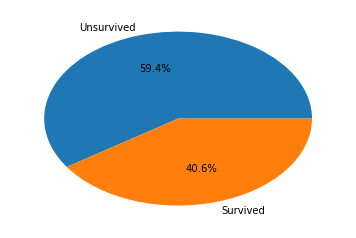

In [13]:
# Draw pie chart of the survival rate and unsurvival rate.
survived_data = clean_df.groupby('Survived')['Survived'].count()
print survived_data
plt.pie(survived_data, labels = ['Unsurvived', 'Survived'], autopct = '%.1f%%')

From the pie chart above, we can make out that the unsurvival rate is bigger than survival rate.

## 双变量分析
### Age VS Survived

Whether the age has relationship with survival rate?

In [14]:
# Split people into some groups by age.
clean_df.is_copy = False
bins = np.arange(0, 90, 10)
clean_df['Age group'] = pd.cut(clean_df['Age'], bins)
clean_df.groupby('Age group')['PassengerId'].count()

Age group
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: PassengerId, dtype: int64

In [15]:
# Calculate each group's survival rate.
survived_rate = clean_df.groupby('Age group')['Survived'].mean()
survived_rate

Age group
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64

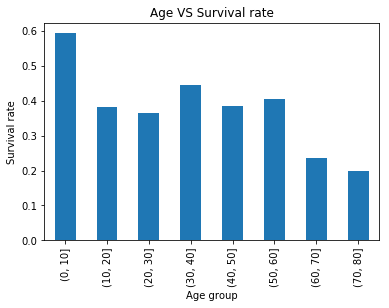

In [16]:
# Draw histogram with each group survival rate.
survived_rate.plot(kind = 'bar')
plt.title('Age VS Survival rate')
plt.ylabel('Survival rate')

In [17]:
# Calculate the total number of each group.
count_of_survived = clean_df.groupby(['Age group', 'Survived'])['Survived'].count().unstack()
count_of_survived

Survived,0,1
Age group,,
"(0, 10]",26,38
"(10, 20]",71,44
"(20, 30]",146,84
"(30, 40]",86,69
"(40, 50]",53,33
"(50, 60]",25,17
"(60, 70]",13,4
"(70, 80]",4,1


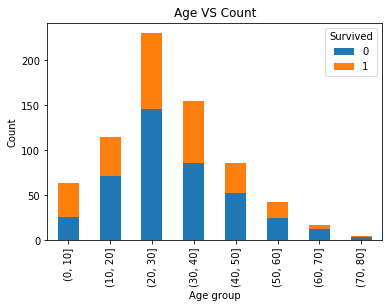

In [18]:
# Draw histogram with each group's total number whether survived.
count_of_survived.plot(kind = 'bar',stacked = 'True')
plt.title('Age VS Count')
plt.ylabel('Count')

There is no relationship between age and people whether survived.

## 双变量分析
### Sex VS Survived

Whether the Sex has relationship with survival rate?

In [19]:
# Split people into two groups by sex.
clean_df.groupby('Sex')['PassengerId'].count()

Sex
female    261
male      453
Name: PassengerId, dtype: int64

In [20]:
# Calculate each group's survival rate
data_of_sex = clean_df.groupby('Sex')['Survived'].mean()
data_of_sex

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

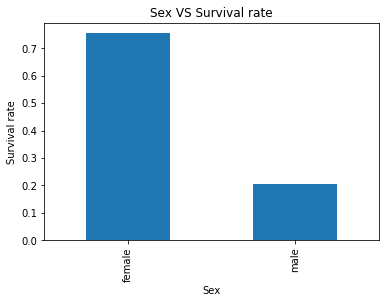

In [21]:
# Draw histogram with each group survival rate.
data_of_sex.plot(kind='bar')
plt.title('Sex VS Survival rate')
plt.ylabel('Survival rate')

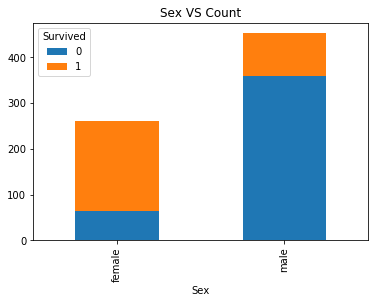

In [22]:
# Draw histogram with each group's total number whether survived.
clean_df.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind = 'bar',stacked = 'True' )
plt.title('Sex VS Count')

The female survived more than male.

## 双变量分析
### Pclass VS Survived

Whether the ticket class has relationship with survival rate?

In [23]:
# Split people by ticket class and whether survived, then calculate survival rate of each group.
data_of_class = clean_df.groupby('Pclass')['Survived'].mean()
data_of_class

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64

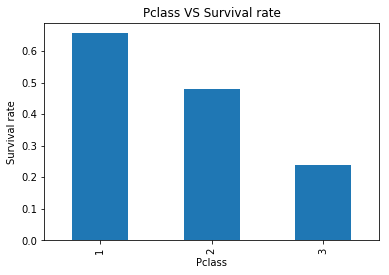

In [24]:
# Draw histogram with each group survival rate.
data_of_class.plot(kind='bar')
plt.title('Pclass VS Survival rate')
plt.ylabel('Survival rate')

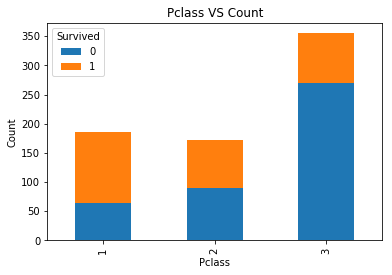

In [25]:
# Draw histogram with each group's total number whether survived.
clean_df.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(kind = 'bar', stacked = 'True')
plt.title('Pclass VS Count')
plt.ylabel('Count')

The survival rate of people in upper class is higher than in lower class.  
PS: Because of the data exclude the people whoes age is missing, there could be sampling error.  
   And we can't consider the potential impact of lurking variables.  
   All the conclusion is temporal, and just for reference.